<a href="https://colab.research.google.com/github/akpax/ExponentialFunc_PyTorch/blob/main/4_match_exponential_w_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Use PyTorch to find the optimal exponential function parameters to match an exponential with noise  

In [8]:
! pip install torch
! pip install matplotlib
! pip install numpy

In [217]:
import torch
from matplotlib.pyplot import scatter
import numpy as np
import math

In [218]:
x = torch.arange(30)
target = torch.randn(30)*10+0.5*(x-10)**2

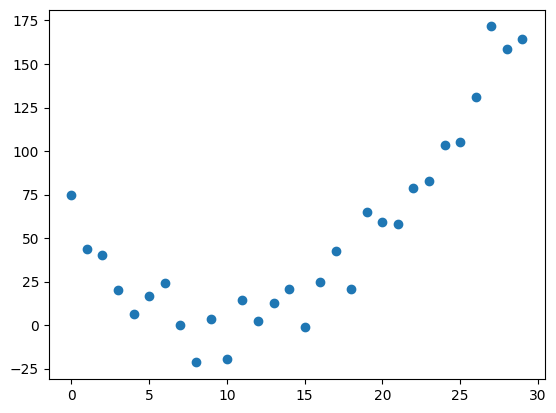

In [219]:
scatter(x,target)

In [220]:
def f(x,params):
  a,b,c=params
  return a*(x**2)+(b*x)+c


In [221]:
# initialize params
params = torch.randn(3).requires_grad_()
pred = f(x,params)

In [222]:
def mse(pred, target):
  return ((pred-target)**2).mean().sqrt()

In [223]:
loss = mse(pred, target)
loss.backward()

In [224]:
print(params.grad)

tensor([382.9302,  16.4901,   0.7380])


In [225]:
lr = 0.0001
params.data -= lr*params.grad.data
params.grad = None

In [226]:
# combine above steps into a function
def step_forward(params):
  pred = f(x,params)
  loss = mse(pred, target)
  loss.backward()
  params.data -= lr*params.grad.data
  params.grad = None
  print(params)
  print(f"Loss: {loss}")
  return pred,loss

In [229]:
while loss>10:
  pred,loss = step_forward(params)

Streaming output truncated to the last 5000 lines.
tensor([ 0.3029, -3.0590,  1.7072], requires_grad=True)
Loss: 22.502803802490234
tensor([ 0.3029, -3.0590,  1.7072], requires_grad=True)
Loss: 22.502796173095703
tensor([ 0.3029, -3.0590,  1.7073], requires_grad=True)
Loss: 22.502784729003906
tensor([ 0.3029, -3.0590,  1.7073], requires_grad=True)
Loss: 22.502779006958008
tensor([ 0.3029, -3.0590,  1.7073], requires_grad=True)
Loss: 22.502769470214844
tensor([ 0.3029, -3.0590,  1.7073], requires_grad=True)
Loss: 22.502761840820312
tensor([ 0.3029, -3.0590,  1.7074], requires_grad=True)
Loss: 22.50275230407715
tensor([ 0.3029, -3.0590,  1.7074], requires_grad=True)
Loss: 22.502742767333984
tensor([ 0.3029, -3.0590,  1.7074], requires_grad=True)
Loss: 22.502735137939453
tensor([ 0.3029, -3.0590,  1.7075], requires_grad=True)
Loss: 22.50272560119629
tensor([ 0.3029, -3.0590,  1.7075], requires_grad=True)
Loss: 22.502716064453125
tensor([ 0.3029, -3.0590,  1.7075], requires_grad=True)
Loss

KeyboardInterrupt: 

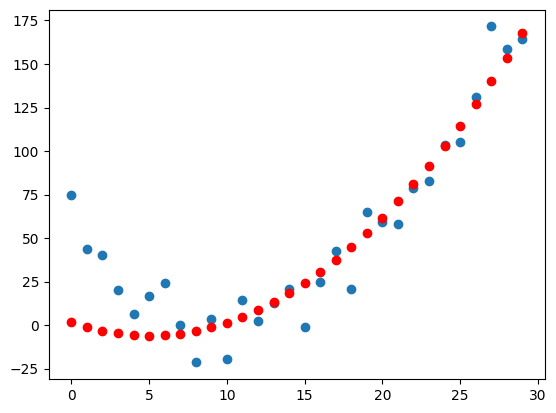

In [230]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(x, target)
ax.scatter(x, pred.detach().numpy(), color="red")

